# Problem Statement
The purpose of this project is to predict the risk of consumers paying off their mortgages early. Because it has an impact on mortgage-backed securities (MBS) investments they are similar to home loan bundles that are marketed to investors. Investors no longer get interest payments on mortgages that are paid off early. To make our predictions even more accurate, we're using data from Freddie Mac, a trusted source in the mortgage industry.

We can uncover trends and indications that help anticipate whether consumers will pay off their mortgages early by analysing this data using machine learning. This prediction can assist investors and financial institutions in making better decisions about MBS investments and risk management.

# Importing Packages and Data

In [1635]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,r2_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

In [1636]:
## Importing the dataset
df=pd.read_csv('LoanExport.csv')
df.head()

C:\Users\Muruganandham K\AppData\Local\Temp\ipykernel_3876\154291414.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [1637]:
df.shape

(291451, 28)

In [1638]:
## Basic information displayed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

### Observations:
There are 291451 records and 28 columns in the dataset
13 columns are numerical, 14 columns are categorical and 1 column is of float

In [1639]:
### Summary statistics of the dataset
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


### Observations:
1. Average credit score is 710 points
2. Average MIP is 9
3. Average OCLTV is 77
4. Average DTI is 30
5. Average OrigUPB is 124940
6. Average LTV is 77
7. Average Interest rate is 7%

# PreProcessing

In [1640]:
# checking for duplicate values
df.duplicated().sum()

0

In [1641]:
## Checking the null values
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

### Handling Missing Values

In [1642]:
for var in ['MSA','PropertyType','NumBorrowers']: ## Loop containing variables used for handling nan values
    df[var]=df[var].str.strip() ## Removing the white space using str.strip()
    df[var]=df[var].replace('X','Other') ## Replacing nan values with a category "Other"

In [1643]:
for var in ['FirstTimeHomebuyer','SellerName']:
    mode=df[var].mode()
    df[var]=df[var].fillna(mode)[0]

In [1644]:
df['PPM']=df['PPM'].replace('X','Other') ## Replacing nan values with "Other"

### Exploratory Data Analysis

### Univariate Analysis

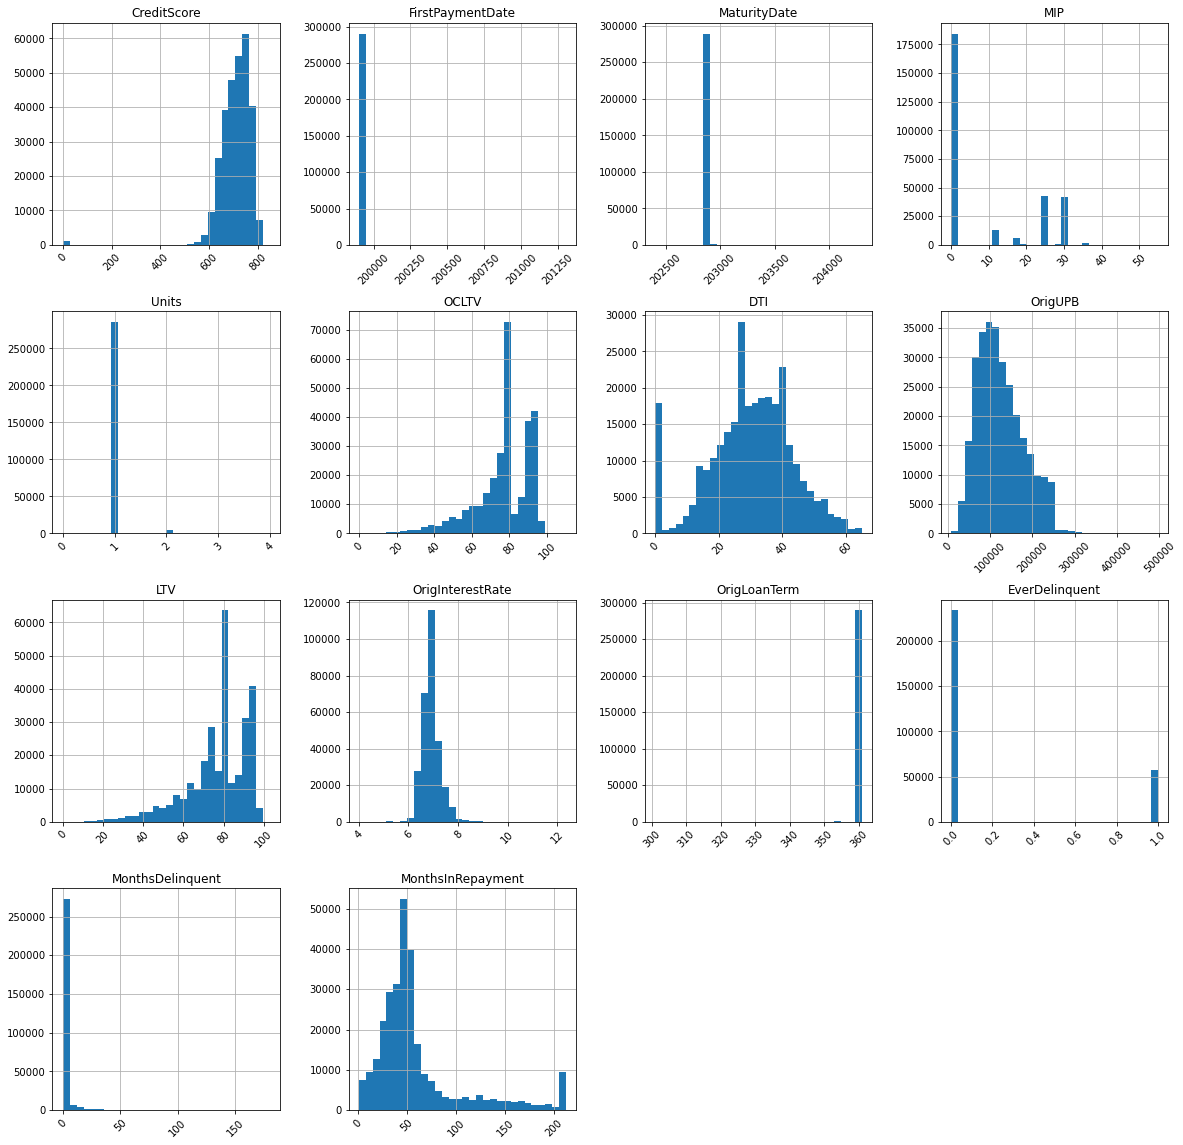

In [1645]:
df.hist(bins=30,figsize=(20,20),xrot=45)
plt.show() ## Histogram for the numerical variables

### Observations:
1. Credit score follows a left skewed distribution. Most values are concentrated within 500-800 points
2. Interest Rates are lying between 6-8%
3. OrigUPB values are lying between 100000-300000
4. LTV and OCLTV follows a left skewed distribution. Highest value of both is between 80 to 100

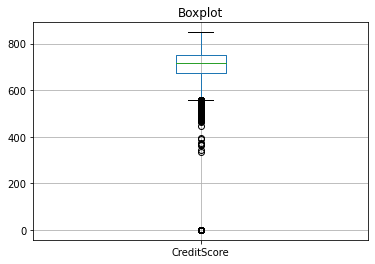

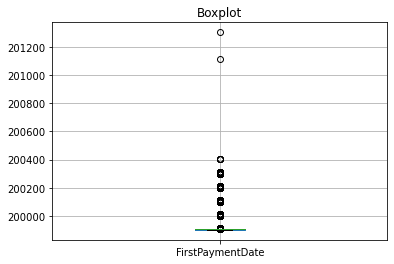

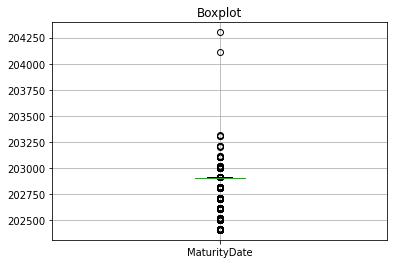

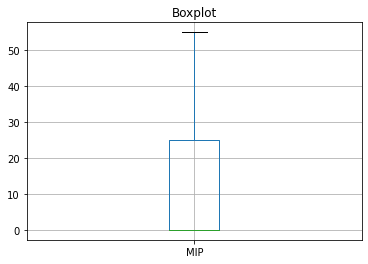

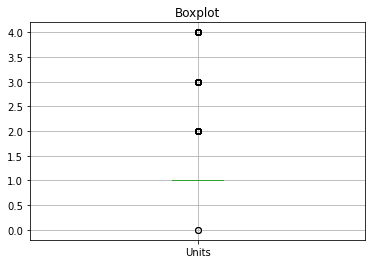

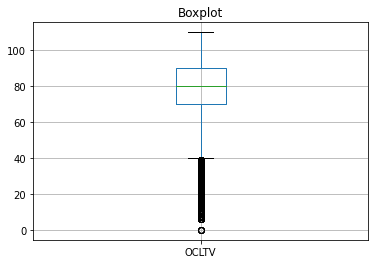

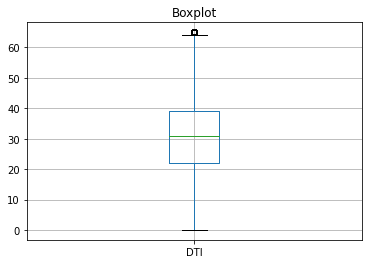

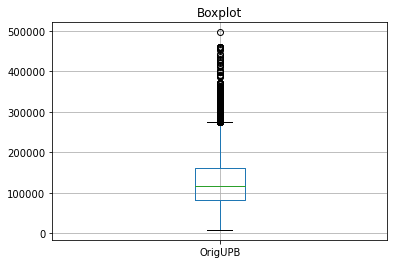

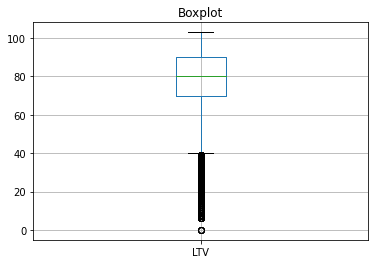

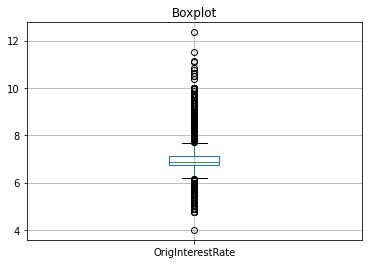

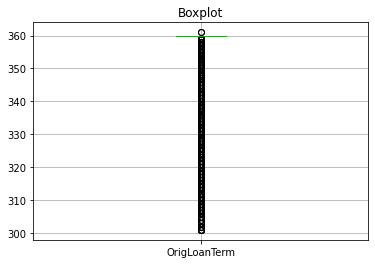

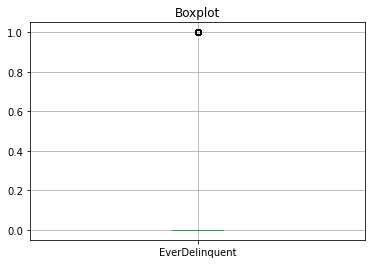

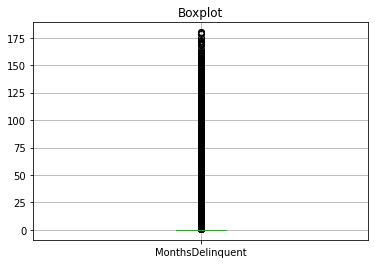

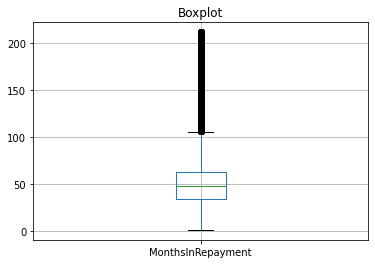

In [1646]:
for var in df.select_dtypes(exclude='O'): ## Loop which contains only numerical variables
    df.boxplot(var) 
    plt.title('Boxplot')
    plt.show() ## Creating a boxplot for all the numerical variables

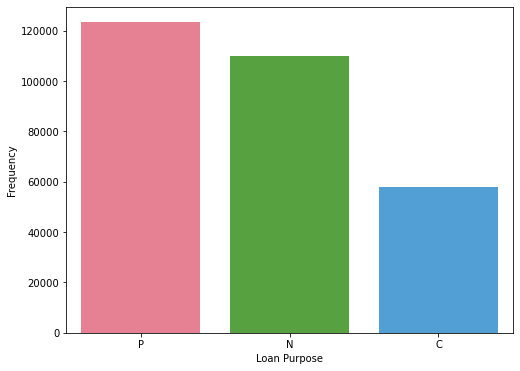

In [1647]:
plt.figure(figsize=(8,6))
sns.countplot(x='LoanPurpose',data=df,palette='husl')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.show() ## Plotting the countplot for loan purpose

### Observations:
The borrowers are mostly taking loans for purpose P followed by N and then C

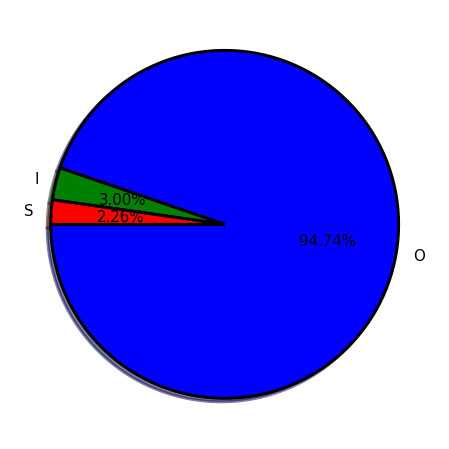

In [1648]:
plt.figure(figsize=(8,8))
plt.pie(df['Occupancy'].value_counts(),labels=['O','I','S'],autopct='%1.2f%%',
       colors=['b','g','r'],startangle=180,shadow=True,textprops={'fontsize':15},
       wedgeprops={'linewidth':3,'width':1,'edgecolor':'k'},explode=[0,0,0])
plt.show() 

### Observations:
1. 94.74% of the observations are owner occupied
2. 3% of the observations are for investment incentive
3. 2.26% of the observations are for second home

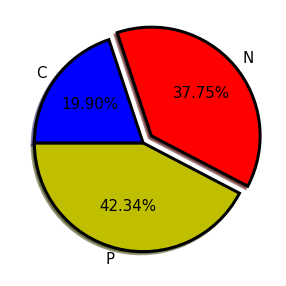

In [1649]:
plt.figure(figsize=(5,5))
plt.pie(df['LoanPurpose'].value_counts(),labels=df['LoanPurpose'].unique(),autopct='%1.2f%%',
       colors=['y','r','b'],startangle=180,shadow=True,textprops={'fontsize':15},
       wedgeprops={'linewidth':3,'width':1,'edgecolor':'k'},explode=[0,0.1,0])
plt.show()

### Observations:
1. 42.34% of the loans are for purpose P
2. 37.75% of the loans are for purpose N
3. 19.9% of the loans are for purpose C

<AxesSubplot:>

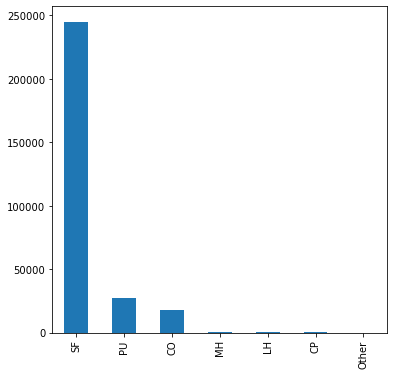

In [1650]:
plt.figure(figsize=(6,6))
df['PropertyType'].value_counts().plot.bar()

### Observations:
Highest number of observations are from property type SF. This means that the loan is taken mostly for the property type SF

In [1651]:
## Creating a function which plots histogram and q-q plot for the variables to check normality
import scipy.stats as stats
def distribution_plot(df,variable):
    plt.figure(figsize=(6,6)) ## figure size is 6,6
    
    plt.subplot(1,2,1) ## 1st row, 2 columns, 1st chart
    df[variable].hist(bins=30)
    plt.title('Histogram of {}'.format(variable))
    
    plt.subplot(1,2,2) ## 1st row,2 columns, 2nd chart
    stats.probplot(df[variable],dist='norm',plot=plt) ## probability plot or q-q plot with distribution as normal
    plt.title('Q-Q Plot of {}'.format(variable))
    
    plt.show() ## plotting histogram and q-q plot of the variables before handling outliers

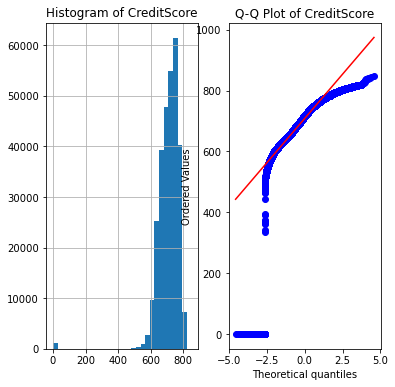

In [1652]:
distribution_plot(df,'CreditScore')

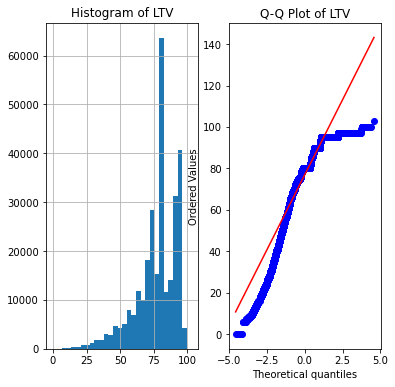

In [1653]:
distribution_plot(df,'LTV')

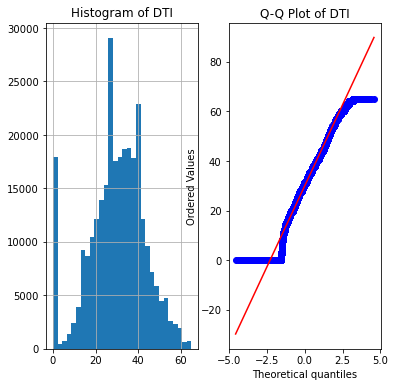

In [1654]:
distribution_plot(df,'DTI')

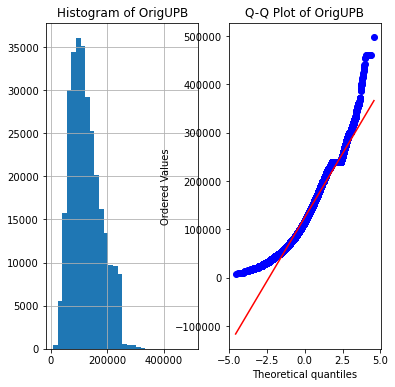

In [1655]:
distribution_plot(df,'OrigUPB')

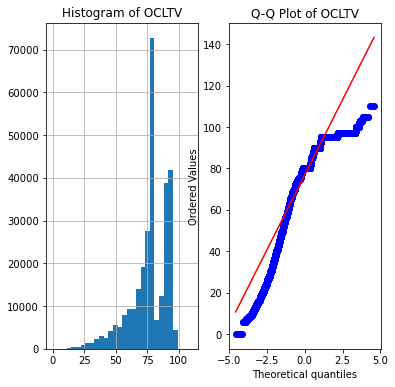

In [1656]:
distribution_plot(df,'OCLTV')

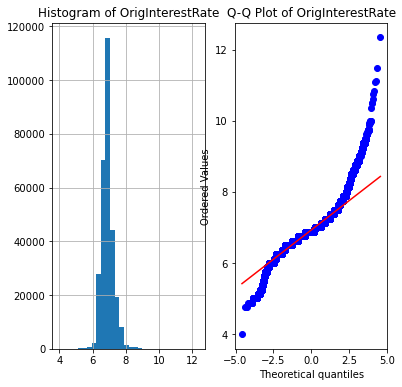

In [1657]:
distribution_plot(df,'OrigInterestRate')

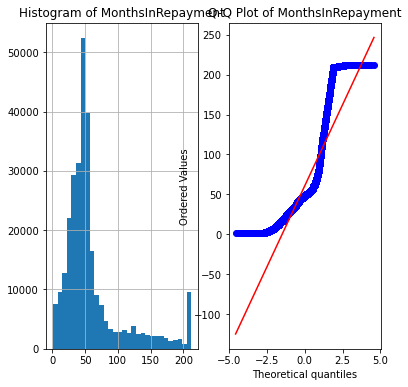

In [1658]:
distribution_plot(df,'MonthsInRepayment')

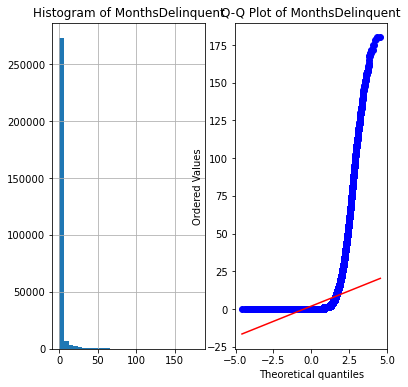

In [1659]:
distribution_plot(df,'MonthsDelinquent')

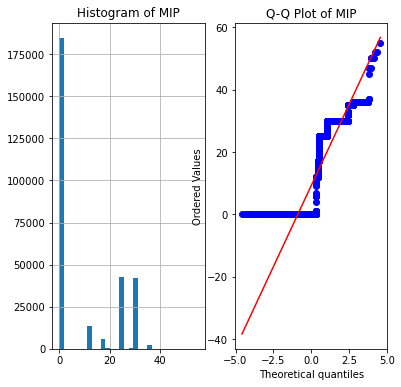

In [1660]:
distribution_plot(df,'MIP')

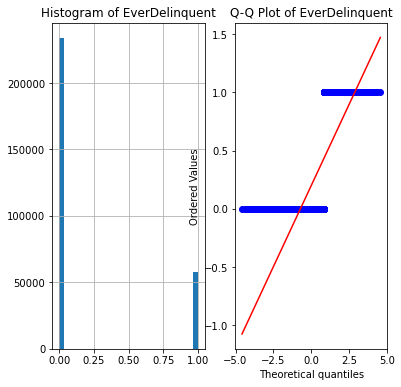

In [1661]:
distribution_plot(df,'EverDelinquent')

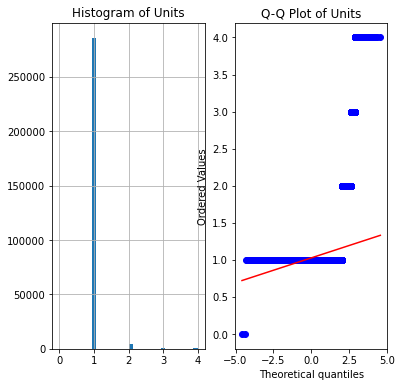

In [1662]:
distribution_plot(df,'Units')

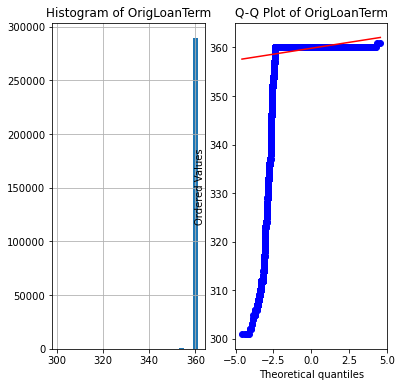

In [1663]:
distribution_plot(df,'OrigLoanTerm')

### Observations:
We can see that there are some variables which follows a skewed distribution and some follow gaussian distribution. We can transform the variables which are skewed to the normal distribution by applying appropriate transformation

### Bivariate Analysis/Multivariate Analysis
1. Numerical vs Numerical
2. Numerical vs Categorical
3. Categorical vs Categorical

In [1664]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DTI', ylabel='CreditScore'>

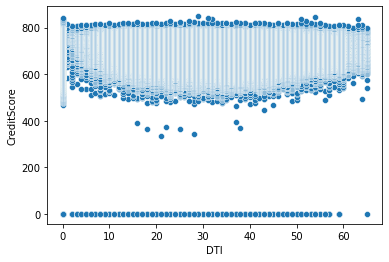

In [1665]:
sns.scatterplot(df['DTI'],df['CreditScore'])

### Observations:
There is a negative relationship between DTI and Credit Score. As DTI increases, Creditscore tends to fall which means that the delinquency rate rises

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LTV', ylabel='DTI'>

D:\Users\Muruganandham K\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


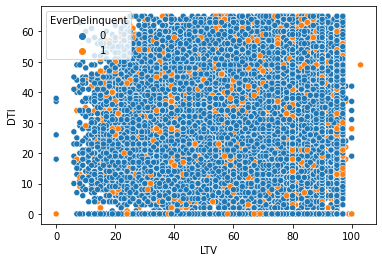

In [1666]:
sns.scatterplot(df['LTV'],df['DTI'],hue=df['EverDelinquent'])

### Observations:
There is a positive relation between LTV and DTI. AS LTV rises, DTI also rises and with an increase in DTI most of the buyers are non-delinquent i.e. they are not behind their payments. Here with an increase in DTI the buyers are still making their payments on time

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OrigInterestRate', ylabel='CreditScore'>

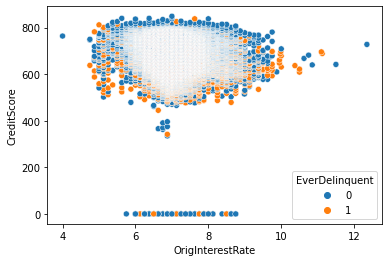

In [1667]:
sns.scatterplot(df['OrigInterestRate'],df['CreditScore'],hue=df['EverDelinquent'])

### Observations:
There is an inverse relation between interest rate and credit score. Again the borrowers are non-delinquent with a fall in credit score due to rise in interest rates. Delinquency rates are lower

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OCLTV', ylabel='OrigInterestRate'>

D:\Users\Muruganandham K\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


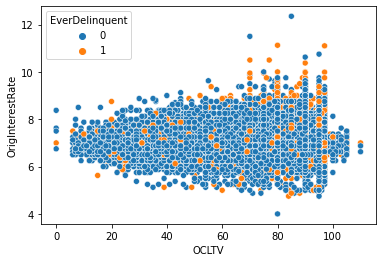

In [1668]:
sns.scatterplot(df['OCLTV'],df['OrigInterestRate'],hue=df['EverDelinquent'])

### Observations:
There is a positive relation between OCLTV and OrigInterestRate. As ocltv rises the interest rates are rising but most of the borrowers are non-delinquent so the delinquency rate is lower 

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LTV', ylabel='MIP'>

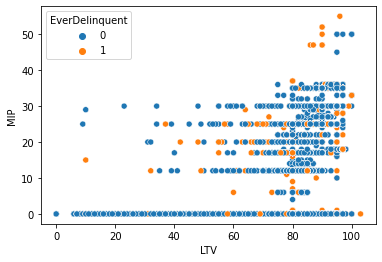

In [1669]:
sns.scatterplot(df['LTV'],df['MIP'],hue=df['EverDelinquent'])

### Observations:
There is a positive relationship between LTV and MIP. With an increase in MIP there are still more non-delinquent borrowers

<AxesSubplot:xlabel='Occupancy', ylabel='CreditScore'>

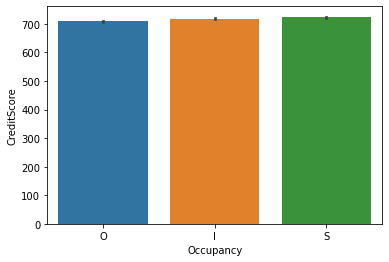

In [1670]:
sns.barplot(data=df,x='Occupancy',y='CreditScore')

### Observations:
Highest Credit score is in Occupancy S i.e. Second home. This means that when the borrower is keeping the house as a seasonal residence rather than his primary residence then the delinquency rates are lower because of high credit score

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanPurpose', ylabel='DTI'>

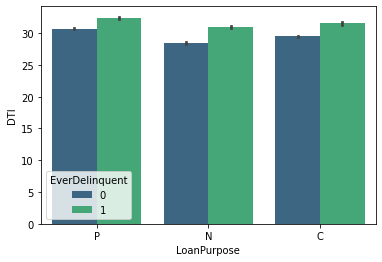

In [1671]:
sns.barplot(df['LoanPurpose'],df['DTI'],hue=df['EverDelinquent'],palette='viridis')

### Observations:
When the loan is taken for purchasing a property i.e. a home purchase then the DTI ratio is the highest for delinquent borrowers borrowers,this means that in case of purchase the delinquency rates are highest. When the mortgage loan is taken for the purpose of refinancing an existing mortgage then the DTI ratio is the lowest for delinquent borrowers, therefore in case of refinancing an existing mortgage the delinquency rates are comparatively lower

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumBorrowers', ylabel='MIP'>

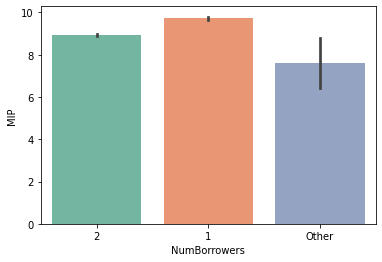

In [1672]:
sns.barplot(df['NumBorrowers'],df['MIP'],palette='Set2')

### Observations:
MIP for 1 borrower is higher than MIP for 2 borrowers, therefore it would be better if the mortgage is purchased by a mix of borrowers so that the premimum is reduced

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverDelinquent', ylabel='LTV'>

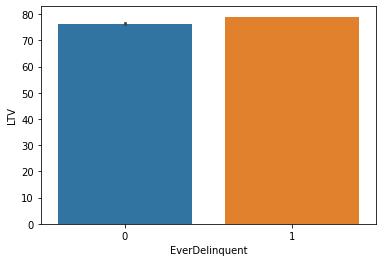

In [1673]:
sns.barplot(df['EverDelinquent'],df['LTV'])

### Observations:
LTV is higher for delinquent borrowers than non-delinquent borrowers. This means that delinquent borrowers have high financial risk and it may affect the prepayment likelihood

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanPurpose', ylabel='CreditScore'>

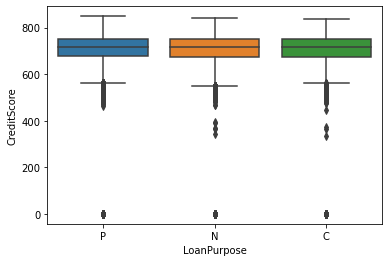

In [1674]:
sns.boxplot(df['LoanPurpose'],df['CreditScore'])

### Observations:
1. The median credit score is around 700 when the loan is taken for purchasing a home property
2. The median credit score is less than 700 when the loan is taken for refinancing a mortgage
3. The median credit score is less than 700 when the loan is taken for cash refinancing

When loan is taken for purchasing a property then there lowest number of outliers

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='DTI'>

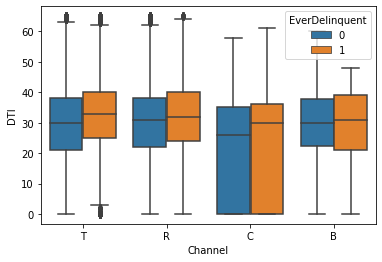

In [1675]:
sns.boxplot(df['Channel'],df['DTI'],hue=df['EverDelinquent'])

### Observations:
1. The median DTI ratio for Delinquent borrowers in channel T is 35 and that of non-delinquent borrowers is 30
2. The median DTI ratio for Delinquent borrowers in channel R is approximately more than 30 and same is that for non-delinquent borrowers

3. The median DTI ratio for delinquent borrowers in channel C is higher than that of Non-delinquent borrowers
4. The median DTI ratio for delinquent borrowers in channel B is same as that of non-delinquent borrowers

For delinquent borrowers outliers are more in channel T

For non-delinquent borrowers outliers are more in channel R

There are no outliers present in channel C and B

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupancy', ylabel='OrigInterestRate'>

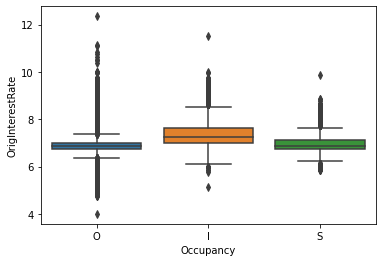

In [1676]:
sns.boxplot(df['Occupancy'],df['OrigInterestRate'])

### Observations:
The median interest rate in investment property is around 7%

The median interest rate in second home is less than 7% i.e. approx 6.3

The median interest rate in owner occupied is around 6.5%

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverDelinquent', ylabel='OCLTV'>

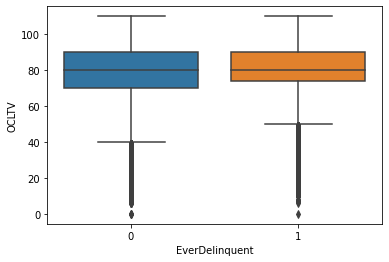

In [1677]:
sns.boxplot(df['EverDelinquent'],df['OCLTV'])

### Observations:
The median ocltv ratio of non-delinquent borrowers is 80

The median ocltv ratio of delinquent borrowers is approximately 80 i.e. 79.998

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverDelinquent', ylabel='CreditScore'>

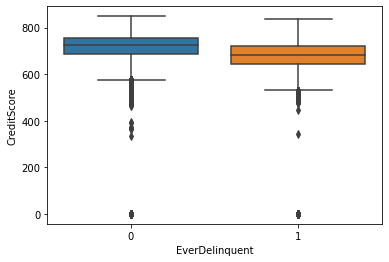

In [1678]:
sns.boxplot(df['EverDelinquent'],df['CreditScore'])

### Observations:
The median creditscore for non-delinquent borrowers is around 760 points

The median creditscore for delinquent borrowers is around 640 points

There are more outliers in non-delinquency than in delinquency

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DTI', ylabel='Density'>

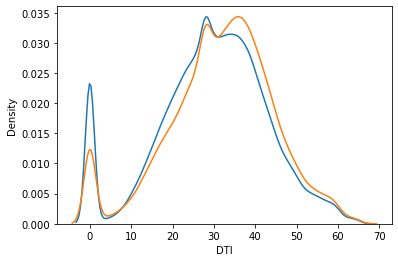

In [1679]:
sns.distplot(df[df['EverDelinquent']==0]['DTI'],hist=False)
sns.distplot(df[df['EverDelinquent']==1]['DTI'],hist=False)

### Observations:
 When DTI is between 0-10, probability of delinquency rates are higher, this implies that prepayment risk is low
 
 When DTI is between 10-30, probability of delinquency rates are lower, this implies that prepayment risk is high
 
 When DTI is between 30-70, probability of delinquency rates are higher, this implies that prepayment risk is low

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTV', ylabel='Density'>

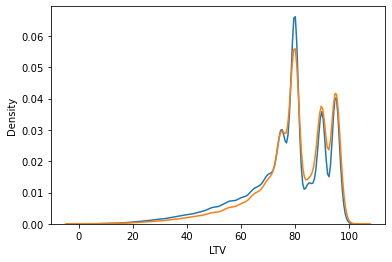

In [1680]:
sns.distplot(df[df['EverDelinquent']==0]['LTV'],hist=False)
sns.distplot(df[df['EverDelinquent']==1]['LTV'],hist=False)

### Observations:
When LTV is between 0-80, probability for non-delinquent rates are high

When LTV is between 80-100, probability for delinquent rates are high

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MIP', ylabel='Density'>

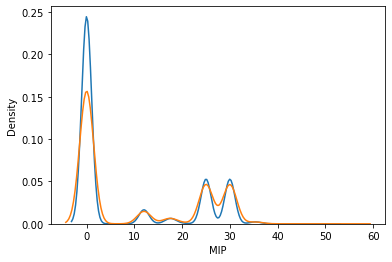

In [1681]:
sns.distplot(df[df['EverDelinquent']==0]['MIP'],hist=False)
sns.distplot(df[df['EverDelinquent']==1]['MIP'],hist=False)

### Observations:
When MIP is between 0-10 and 10-20, probability for delinquent rates are high

When MIP is 20-30, probability for non-delinquent rates are high

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OrigInterestRate', ylabel='Density'>

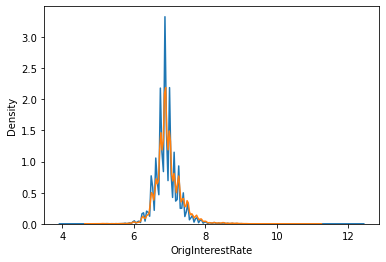

In [1682]:
sns.distplot(df[df['EverDelinquent']==0]['OrigInterestRate'],hist=False)
sns.distplot(df[df['EverDelinquent']==1]['OrigInterestRate'],hist=False)

### Observations:
When interest rates are between 6%-8%, probability for non-delinquent rates are high

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

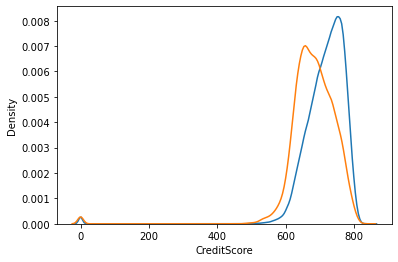

In [1683]:
sns.distplot(df[df['EverDelinquent']==0]['CreditScore'],hist=False)
sns.distplot(df[df['EverDelinquent']==1]['CreditScore'],hist=False)

### Observations:
When credit score is between 400-700 points, probability for delinquent rates are high

When credit score is between 700-800 points, probability for non-delinquent rates are high

In [1684]:
pd.crosstab(df['EverDelinquent'],df['LoanPurpose'])

LoanPurpose,C,N,P
EverDelinquent,,,
0,45710,88008,100070
1,12301,22028,23334


### Observations:
The delinquency rates are lowest in cash refinancing and highest in purchasing a property

In [1685]:
pd.crosstab(df['EverDelinquent'],df['Occupancy'])

Occupancy,I,O,S
EverDelinquent,,,
0,6714,221756,5318
1,2020,54375,1268


### Observations:
Delinquency rates are lowest in Second home and highest in Owner Occupied

<AxesSubplot:xlabel='Channel', ylabel='EverDelinquent'>

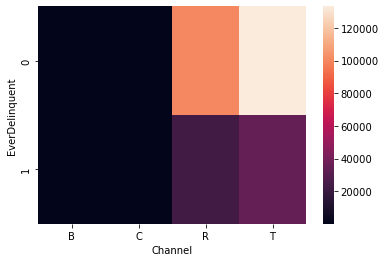

In [1686]:
sns.heatmap(pd.crosstab(df['EverDelinquent'],df['Channel']))

### Observations:
The delinquency rates are low in channel B and C, moderately high in channel R and highest in channel T

In [1687]:
pd.crosstab(df['EverDelinquent'],df['PPM'])

PPM,N,Other,Y
EverDelinquent,,,
0,226091,4389,3308
1,56034,1016,613


### Observations:
When there is no penalty the number of non-delinquent borrowers are more than the delinquent ones

When there is penalty the number of non-delinquent borrowers are more than the delinquent ones

In [1688]:
pd.crosstab(df['EverDelinquent'],df['NumBorrowers'])

NumBorrowers,1,2,Other
EverDelinquent,,,
0,79235,154264,289
1,24542,33071,50


### Observations:
Number of non-delinquent borrowers are more when there are 2 borrowers
Number of delinquent borrowers are also more when there are 2 borrowers

Text(0.5, 0, 'Percentage of delinquent borrowers')

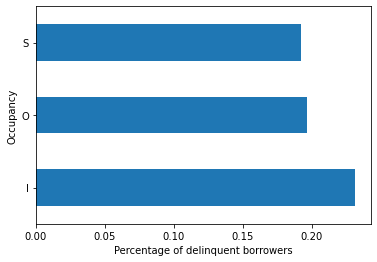

In [1689]:
df.groupby('Occupancy')['EverDelinquent'].mean().plot(kind='barh')
plt.xlabel('Percentage of delinquent borrowers')

### Observations:
On an average the percentage of delinquent borrowers is the highest in Investment property followed by Owner occupied and lowest in Second home

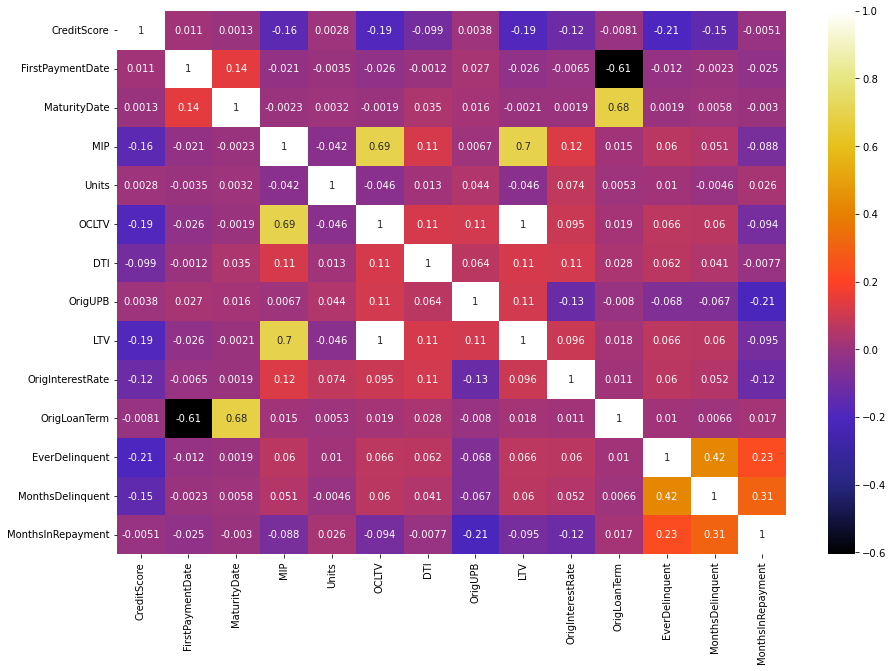

In [1690]:
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap)
plt.show()

### Observations:
1. There is very high correlation between MIP and LTV
2. There is very high correlation between OrigLoanterm and maturity date
3. There is very high correlation between OCLTV and MIP
4. Highest correlated features with EverDelinquent are MonthsDelinquent and MonthsRepayment
5. Correlation is moderately high between MonthsRepayment and MonthsDelinquent

### Data Preprocessing

### Handling Outliers

In [1691]:
## Function for removing outliers with 85th percentile and 5th percentile
def remove_outliers(df,variable):
    
    upper_limit=df[variable].quantile(0.85)
    lower_limit=df[variable].quantile(0.15)
    df[variable]=np.where(df[variable]<=upper_limit,upper_limit,
                         np.where(df[variable]>=lower_limit,lower_limit,
                                 df[variable])) ## We want values lower than upper limit and larger than lower limit

In [1692]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    remove_outliers(df,variable) ## Loop to remove outliers for the variables in the list

In [1693]:
## Function to plot distribution after removing outliers
def distribution_plot(df,variable):
    plt.figure(figsize=(8,6))
    
    plt.subplot(1,2,1)
    df.boxplot(column=variable)
    plt.title('Boxplot after handling outliers')
    
    plt.subplot(1,2,2)
    sns.distplot(df[variable])
    plt.title('Distribution after handling outliers')
    
    plt.show()

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


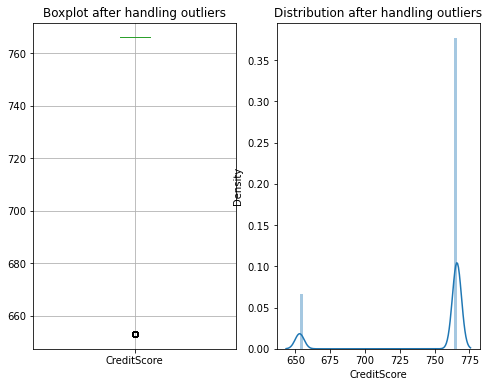

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


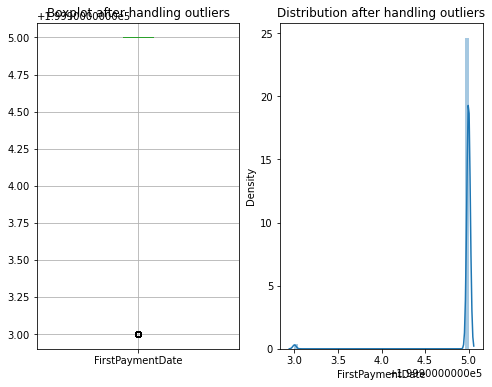

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


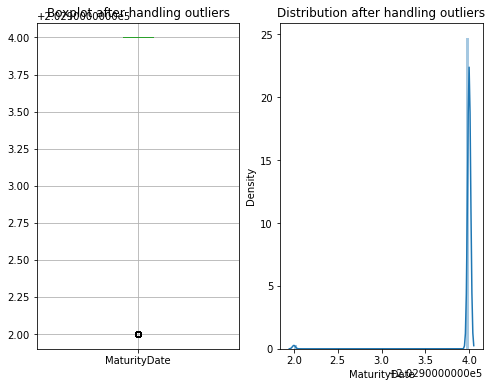

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


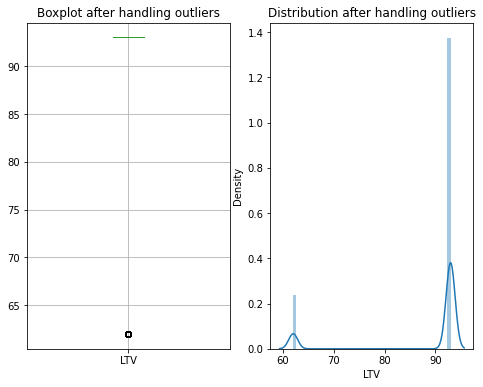

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


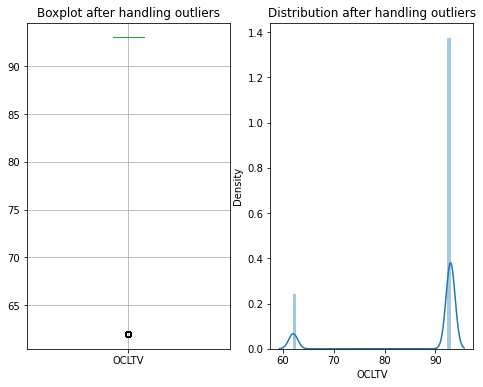

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


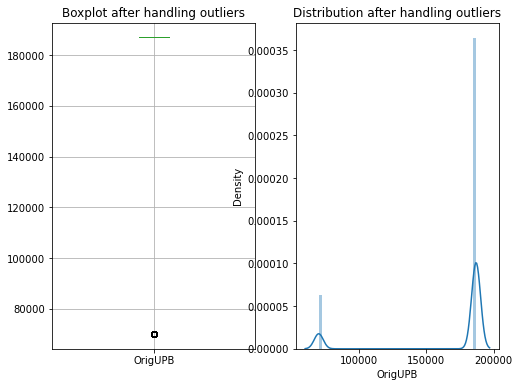

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


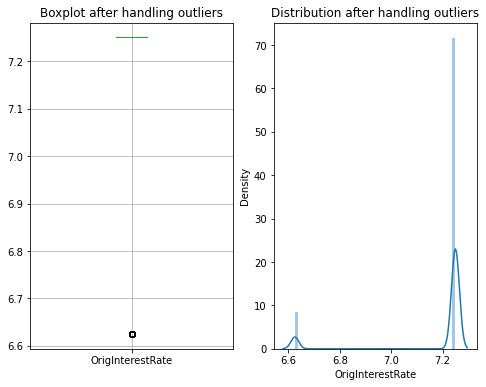

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


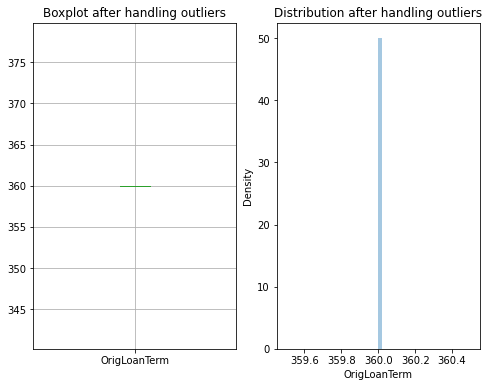

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


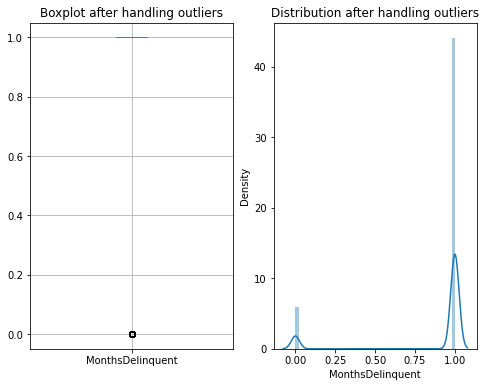

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


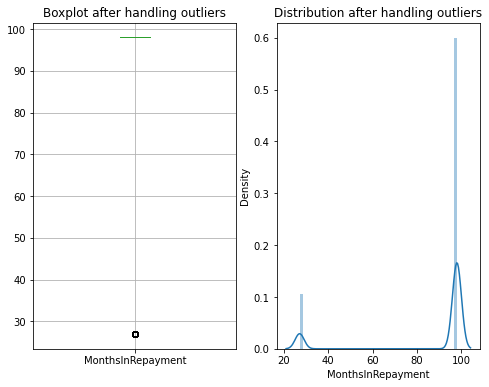

In [1694]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    distribution_plot(df,variable)

### Observations:
We can see that after capping outliers, the original distribution of the variables is preserved.

In some variables the outliers are removed while in other the outliers are capped to store relevant information

### Categorical Encoding

In [1695]:
for var in ['Occupancy','Channel','PPM','LoanPurpose','NumBorrowers','FirstTimeHomebuyer']:
    ordinal_mapping={k:i for i,k in enumerate(df[var].unique(),0)} ## Assigning labels starting from 0
    df[var]=df[var].map(ordinal_mapping) ## Encoding the variables with the labels ass

In [1696]:
for var in ['PostalCode','ServicerName','MSA']:
    frequency_map=(df[var].value_counts()/len(df)).to_dict() ## Calculating the frequency of the variables and convert them into
    ## a dictionary
    df[var]=df[var].map(frequency_map) ## Encoding with the frequency of the variables

In [1697]:
for variable in ['PropertyState','PropertyType']:
    count_map=df[variable].value_counts().to_dict() ## Calculating the number of observations present in each feature
    df[variable]=df[variable].map(count_map) ## Encoding the variables with the 

In [1698]:
df.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True) ## Dropping 

In [1699]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyState,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,766.0,199905.0,0,202904.0,0.030094,25,1,0,93.0,27,...,13621,244923,0.003798,0,360.0,0,0.077632,0,1.0,98.0
1,766.0,199905.0,0,202904.0,0.018991,0,1,0,93.0,17,...,10127,244923,0.004203,1,360.0,1,0.018525,0,1.0,27.0
2,766.0,199905.0,0,202904.0,0.000261,0,1,0,93.0,16,...,2321,244923,0.000968,1,360.0,0,0.077632,0,1.0,98.0
3,766.0,199905.0,0,202904.0,0.032040,0,1,0,93.0,14,...,43327,244923,0.001644,1,360.0,0,0.039664,0,1.0,98.0
4,766.0,199905.0,0,202904.0,0.014253,0,1,0,93.0,18,...,7457,244923,0.000947,1,360.0,0,0.039664,0,1.0,98.0


In [1700]:
for var in ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigLoanTerm','MonthsInRepayment']:
    df[var]=df[var].round(1).astype(int) ## rounding off the values to 1 decimal point to simplify the process

In [1701]:
df['FirstPaymentDate']=df['FirstPaymentDate'].astype(str) ## converting the feature into string
df['FirstPaymentDate']=pd.to_datetime(df['FirstPaymentDate'],format="%Y%m") ## converting to appropriate date-time format 
## using year and month

In [1702]:
df['MaturityDate']=df['MaturityDate'].astype(str)
df['MaturityDate']=pd.to_datetime(df['MaturityDate'],format="%Y%m")

In [1703]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyState,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,766,1999-05-01,0,2029-04-01,0.030094,25,1,0,93,27,...,13621,244923,0.003798,0,360,0,0.077632,0,1.0,98
1,766,1999-05-01,0,2029-04-01,0.018991,0,1,0,93,17,...,10127,244923,0.004203,1,360,1,0.018525,0,1.0,27
2,766,1999-05-01,0,2029-04-01,0.000261,0,1,0,93,16,...,2321,244923,0.000968,1,360,0,0.077632,0,1.0,98
3,766,1999-05-01,0,2029-04-01,0.032040,0,1,0,93,14,...,43327,244923,0.001644,1,360,0,0.039664,0,1.0,98
4,766,1999-05-01,0,2029-04-01,0.014253,0,1,0,93,18,...,7457,244923,0.000947,1,360,0,0.039664,0,1.0,98


In [1704]:
df['FirstPaymentYear']=df['FirstPaymentDate'].dt.year ## extracting year from firstpaymentdate
df['FirstPaymentMonth']=df['FirstPaymentDate'].dt.month ## extracting month from firstpaymentdate
df['MaturityYear']=df['MaturityDate'].dt.year ## extracting year from maturitydate
df['MaturityMonth']=df['MaturityDate'].dt.month ## extracting month from maturitydate

In [1705]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth
0,766,1999-05-01,0,2029-04-01,0.030094,25,1,0,93,27,...,360,0,0.077632,0,1.0,98,1999,5,2029,4
1,766,1999-05-01,0,2029-04-01,0.018991,0,1,0,93,17,...,360,1,0.018525,0,1.0,27,1999,5,2029,4
2,766,1999-05-01,0,2029-04-01,0.000261,0,1,0,93,16,...,360,0,0.077632,0,1.0,98,1999,5,2029,4
3,766,1999-05-01,0,2029-04-01,0.032040,0,1,0,93,14,...,360,0,0.039664,0,1.0,98,1999,5,2029,4
4,766,1999-05-01,0,2029-04-01,0.014253,0,1,0,93,18,...,360,0,0.039664,0,1.0,98,1999,5,2029,4


In [1706]:
df.drop(['FirstPaymentDate','MaturityDate'],axis=1,inplace=True) ## dropping the firstpaymentdate and maturitydate

### Feature Scaling

In [1720]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X=df.drop('EverDelinquent',axis=1) ## independent variables
y=df['EverDelinquent'] ## dependent variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to
## training
X_train.shape,X_test.shape

((233160, 26), (58291, 26))

In [1721]:
scaler=StandardScaler() ## object for standardscaler
X_train=scaler.fit_transform(X_train) ## fitting the standardscaler object in train set
X_test=scaler.transform(X_test) ## fitting the scaler object in test set

### Feature Selection

### Mutual Information Gain for feature selection

In [1722]:
from sklearn.feature_selection import mutual_info_classif

In [1723]:
mutual_info=mutual_info_classif(X,y)

<AxesSubplot:>

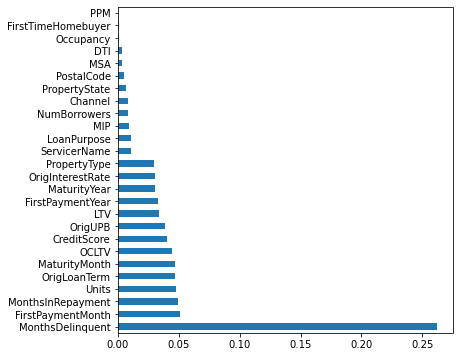

In [1724]:
mutual_info=pd.Series(mutual_info,index=X.columns)
mutual_info.sort_values(ascending=False).plot(kind='barh',figsize=(6,6))

In [1725]:
mutual_info.sort_values(ascending=False)

MonthsDelinquent      0.261600
FirstPaymentMonth     0.050736
MonthsInRepayment     0.049867
Units                 0.047435
OrigLoanTerm          0.047336
MaturityMonth         0.047201
OCLTV                 0.044509
CreditScore           0.040293
OrigUPB               0.038675
LTV                   0.034286
FirstPaymentYear      0.032877
MaturityYear          0.030759
OrigInterestRate      0.030193
PropertyType          0.029832
ServicerName          0.011175
LoanPurpose           0.010835
MIP                   0.009594
NumBorrowers          0.008357
Channel               0.008276
PropertyState         0.006407
PostalCode            0.004795
MSA                   0.003804
DTI                   0.003277
Occupancy             0.001311
FirstTimeHomebuyer    0.000844
PPM                   0.000034
dtype: float64

### Model building

In [1726]:
X=df[['MonthsDelinquent','CreditScore','MaturityMonth','FirstPaymentMonth','OrigLoanTerm','OrigInterestRate',
     'OrigUPB','Units','PropertyType','MaturityYear','FirstPaymentYear','DTI','MIP']]
y=df['EverDelinquent']

In [1727]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((204015, 13), (87436, 13))

In [1728]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train, y_train)

y_pred_train = logreg_model.predict(X_train)
y_pred_test = logreg_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Logistic Regression - Train Accuracy: {accuracy_train:.2f}")
print(f"Logistic Regression - Test Accuracy: {accuracy_test:.2f}")

Logistic Regression - Train Accuracy: 0.80
Logistic Regression - Test Accuracy: 0.80


In [1729]:
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_test))

D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     70195
         1.0       0.00      0.00      0.00     17241

    accuracy                           0.80     87436
   macro avg       0.40      0.50      0.45     87436
weighted avg       0.64      0.80      0.72     87436

ROC AUC score: 0.5


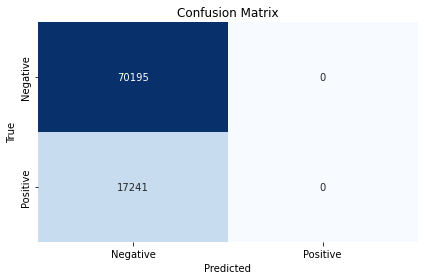

In [1730]:
cm=confusion_matrix(y_test,y_pred_test)
fig,ax=plt.subplots()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

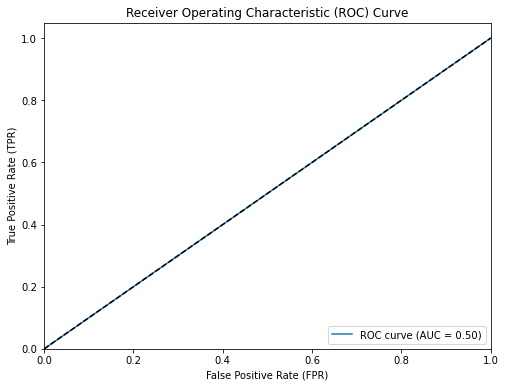

AUC: 0.5


In [1731]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC:', auc)


In [1732]:

# Create a logistic regression model with L1 (Lasso) regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Create a logistic regression model with L2 (Ridge) regularization
model_l2 = LogisticRegression(penalty='l2', solver='sag', random_state=42)

# Create a logistic regression model with Elastic Net regularization
model_elastic_net = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)

In [1733]:
model_l1.fit(X_train, y_train)

y_pred_train = model_l1.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Data Accuracy: {accuracy:.2f}')

y_pred_test = model_l1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Testing Data Accuracy: {accuracy:.2f}')
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_test))

Training Data Accuracy: 0.92
Testing Data Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     70195
         1.0       1.00      0.60      0.75     17241

    accuracy                           0.92     87436
   macro avg       0.96      0.80      0.85     87436
weighted avg       0.93      0.92      0.91     87436

Confusion Matrix:
 [[70195     0]
 [ 6931 10310]]
ROC AUC score: 0.7989965779247143


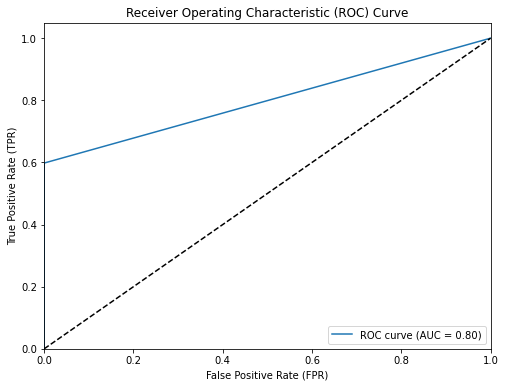

AUC: 0.7989965779247143


In [1734]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC:', auc)


In [1735]:
model_l2.fit(X_train, y_train)

y_pred_train = model_l2.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Data Accuracy: {accuracy:.2f}')

y_pred_test = model_l2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Testing Data Accuracy: {accuracy:.2f}')
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_test))

D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Data Accuracy: 0.80
Testing Data Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     70195
         1.0       0.00      0.00      0.00     17241

    accuracy                           0.80     87436
   macro avg       0.40      0.50      0.45     87436
weighted avg       0.64      0.80      0.72     87436

Confusion Matrix:
 [[70195     0]
 [17241     0]]
ROC AUC score: 0.5


D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


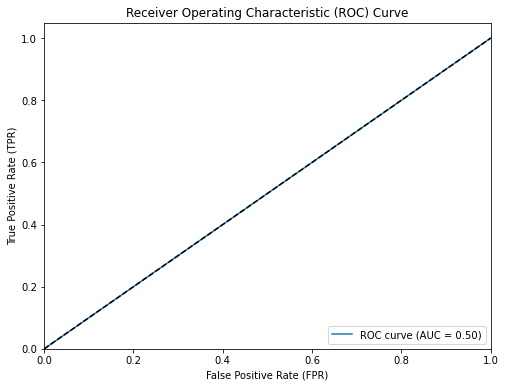

AUC: 0.5


In [1736]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC:', auc)


In [1737]:
model_elastic_net.fit(X_train, y_train)

y_pred_train = model_elastic_net.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training Data Accuracy: {accuracy:.2f}')

y_pred_test = model_elastic_net.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Testing Data Accuracy: {accuracy:.2f}')
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, y_pred_test))

D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Data Accuracy: 0.80
Testing Data Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     70195
         1.0       0.00      0.00      0.00     17241

    accuracy                           0.80     87436
   macro avg       0.40      0.50      0.45     87436
weighted avg       0.64      0.80      0.72     87436

Confusion Matrix:
 [[70195     0]
 [17241     0]]
ROC AUC score: 0.5


D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


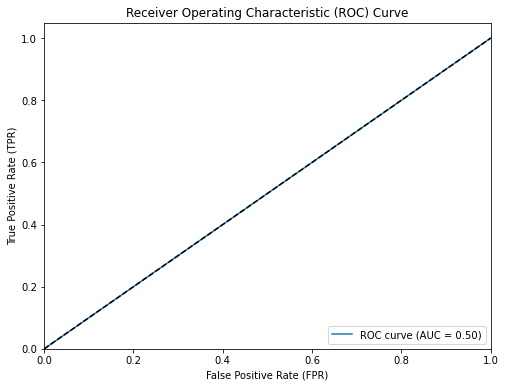

AUC: 0.5


In [1738]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC:', auc)


In [1739]:
from sklearn.ensemble import RandomForestClassifier 

In [1740]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

rf_accuracy_train = accuracy_score(y_train, rf_pred_train)
rf_accuracy_test = accuracy_score(y_test, rf_pred_test)

print(f"Random Forest - Train Accuracy: {rf_accuracy_train:.2f}")
print(f"Random Forest - Test Accuracy: {rf_accuracy_test:.2f}")

Random Forest - Train Accuracy: 0.92
Random Forest - Test Accuracy: 0.92


In [1741]:
print('Classification Report:\n',classification_report(y_test,rf_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, rf_pred_test))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     70195
         1.0       0.98      0.60      0.74     17241

    accuracy                           0.92     87436
   macro avg       0.95      0.80      0.85     87436
weighted avg       0.92      0.92      0.91     87436

ROC AUC score: 0.7984262224037465


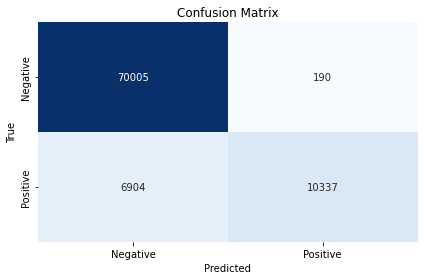

In [1742]:
cm=confusion_matrix(y_test,rf_pred_test)
fig,ax=plt.subplots()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

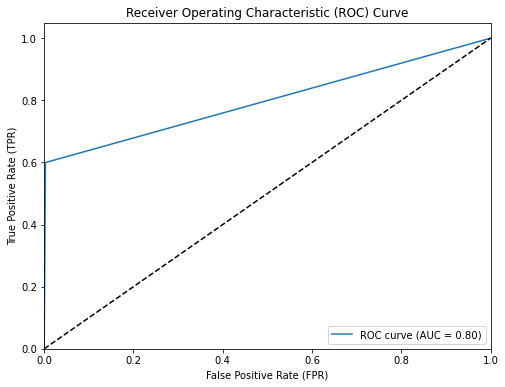

AUC: 0.7984262224037465


In [1743]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rf_pred_test)

# Calculate AUC
auc = roc_auc_score(y_test, rf_pred_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC:', auc)

### Gradient Boosting Classifier

In [1744]:
X=df[['MonthsDelinquent','CreditScore','MaturityMonth','FirstPaymentMonth','OrigLoanTerm','OrigInterestRate',
     'OrigUPB','Units','PropertyType','MaturityYear','FirstPaymentYear','DTI','MIP']]
y=df['EverDelinquent']

In [1745]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

gbc_pred_train = rf_model.predict(X_train)
gbc_pred_test = rf_model.predict(X_test)

gbc_accuracy_train = accuracy_score(y_train, gbc_pred_train)
gbc_accuracy_test = accuracy_score(y_test, gbc_pred_test)

print(f"Gradient Boosting Classifier - Train Accuracy: {gbc_accuracy_train:.2f}")
print(f"Gradient Boosting Classifier - Test Accuracy: {gbc_accuracy_test:.2f}")

Gradient Boosting Classifier - Train Accuracy: 0.92
Gradient Boosting Classifier - Test Accuracy: 0.92


In [1746]:
print('Classification Report:\n',classification_report(y_test,gbc_pred_test))
print("ROC AUC score:", roc_auc_score(y_test, gbc_pred_test))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     70195
         1.0       0.98      0.60      0.74     17241

    accuracy                           0.92     87436
   macro avg       0.95      0.80      0.85     87436
weighted avg       0.92      0.92      0.91     87436

ROC AUC score: 0.7984262224037465


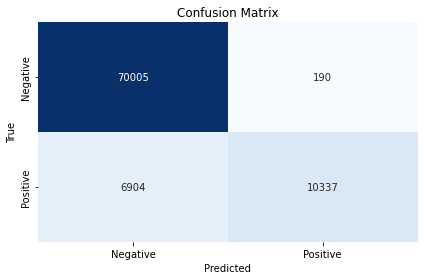

In [1747]:
## Confusion Matrix
cm=confusion_matrix(y_test,gbc_pred_test)
fig,ax=plt.subplots()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

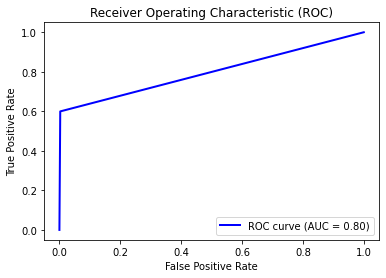

In [1748]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and y_pred defined

fpr, tpr, thresholds = roc_curve(y_test, gbc_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Prepayment Risk Prediction

In [1749]:
data=pd.read_csv('LoanExport.csv')
data.head()

C:\Users\Muruganandham K\AppData\Local\Temp\ipykernel_3876\1530365617.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [1750]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [1751]:
from sklearn.preprocessing import MinMaxScaler

data['PrepaymentRisk'] = data['CreditScore'] * data['DTI']

# Scale the prepayment risk values between 0 and 1
scaler = MinMaxScaler()
data['PrepaymentRisk'] = scaler.fit_transform(data[['PrepaymentRisk']])

In [1752]:
print('min',data['PrepaymentRisk'].min())
print('max',data['PrepaymentRisk'].max())
print('mean',data['PrepaymentRisk'].mean())
print('mode',data['PrepaymentRisk'].mode())

min 0.0
max 1.0
mean 0.40161074136013875
mode 0    0.0
Name: PrepaymentRisk, dtype: float64


D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PrepaymentRisk', ylabel='Density'>

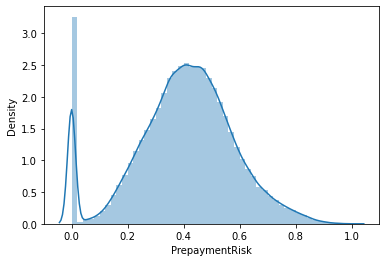

In [1753]:
sns.distplot(data['PrepaymentRisk'])

In [1754]:
cormat = data.corr()
round(cormat,2)
cormat.style.background_gradient(cmap='coolwarm') 

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,PrepaymentRisk
CreditScore,1.000000,0.011249,0.001346,-0.164376,0.002808,-0.190848,-0.098740,0.003770,-0.191080,-0.119472,-0.008075,-0.207204,-0.150266,-0.005127,0.111190
FirstPaymentDate,0.011249,1.000000,0.142768,-0.020830,-0.003539,-0.025962,-0.001190,0.027332,-0.026119,-0.006470,-0.605893,-0.011898,-0.002257,-0.025434,0.000742
MaturityDate,0.001346,0.142768,1.000000,-0.002338,0.003166,-0.001901,0.035039,0.015623,-0.002138,0.001945,0.682230,0.001860,0.005761,-0.002989,0.034290
MIP,-0.164376,-0.020830,-0.002338,1.000000,-0.042111,0.694789,0.111603,0.006729,0.695888,0.124544,0.014834,0.059993,0.051204,-0.087802,0.076437
Units,0.002808,-0.003539,0.003166,-0.042111,1.000000,-0.046133,0.012887,0.043827,-0.046032,0.074070,0.005348,0.010163,-0.004573,0.025594,0.014510
OCLTV,-0.190848,-0.025962,-0.001901,0.694789,-0.046133,1.000000,0.114853,0.106273,0.999470,0.095268,0.018560,0.065528,0.059811,-0.094299,0.075279
DTI,-0.098740,-0.001190,0.035039,0.111603,0.012887,0.114853,1.000000,0.063640,0.114468,0.105216,0.028005,0.062109,0.040830,-0.007732,0.973836
OrigUPB,0.003770,0.027332,0.015623,0.006729,0.043827,0.106273,0.063640,1.000000,0.105722,-0.128563,-0.008008,-0.067605,-0.067243,-0.211698,0.063599
LTV,-0.191080,-0.026119,-0.002138,0.695888,-0.046032,0.999470,0.114468,0.105722,1.000000,0.095520,0.018477,0.065735,0.059930,-0.094596,0.074848
OrigInterestRate,-0.119472,-0.006470,0.001945,0.124544,0.074070,0.095268,0.105216,-0.128563,0.095520,1.000000,0.010794,0.060418,0.051706,-0.120378,0.079655


In [1755]:
#Now we'll try to find which features are strongly correlated with CreditScore
cormat = cormat['PrepaymentRisk'][:-1]  # -1 because the latest row is SalePrice
golden_features_list = cormat[abs(cormat) > 0.05].sort_values(ascending=False)
print("There are {} strongly correlated values with PrepaymentRisk:\n{}".format(len(golden_features_list), golden_features_list))

There are 7 strongly correlated values with PrepaymentRisk:
DTI                 0.973836
CreditScore         0.111190
OrigInterestRate    0.079655
MIP                 0.076437
OCLTV               0.075279
LTV                 0.074848
OrigUPB             0.063599
Name: PrepaymentRisk, dtype: float64


In [1756]:
for var in ['MSA','PropertyType','NumBorrowers']: ## Loop containing variables used for handling nan values
    data[var]=data[var].str.strip() ## Removing the white space using str.strip()
    data[var]=data[var].replace('X','Other') ## Replacing nan values with a category "Other"

In [1757]:
for var in ['FirstTimeHomebuyer','SellerName']:
    mode=data[var].mode()
    data[var]=data[var].fillna(mode)[0]

In [1758]:
data['PPM']=data['PPM'].replace('X','Other') ## Replacing nan values with "Other"

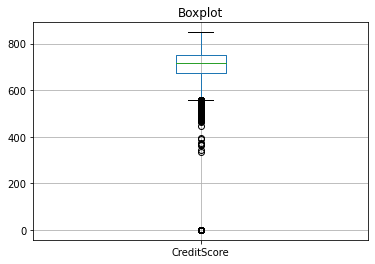

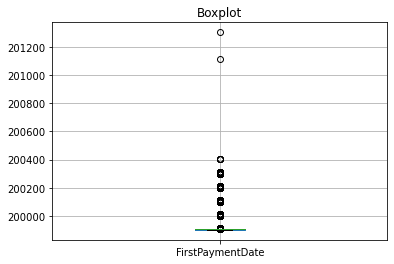

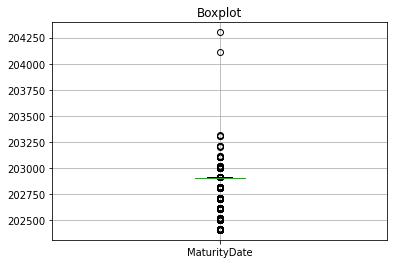

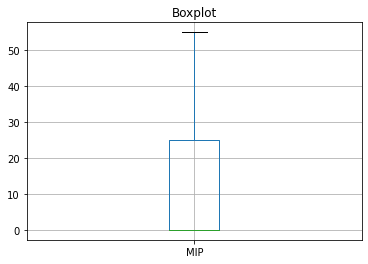

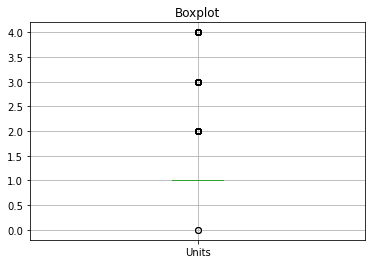

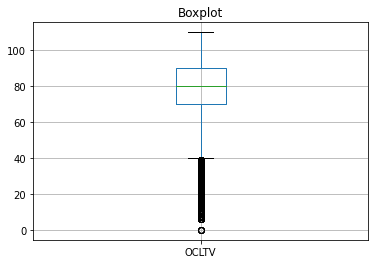

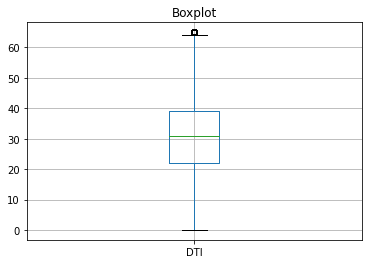

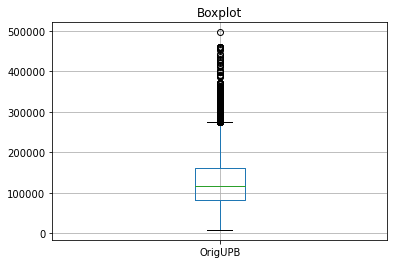

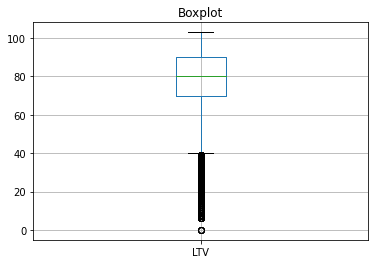

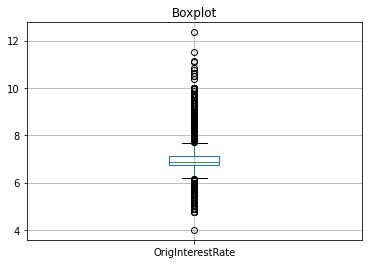

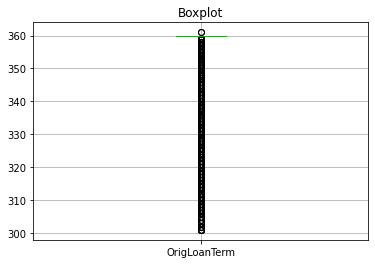

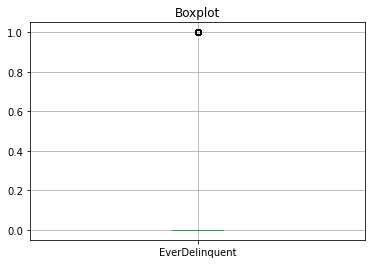

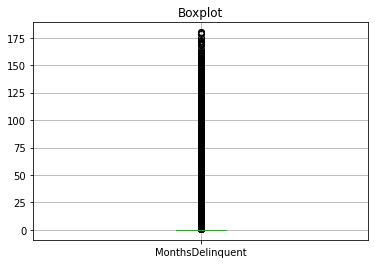

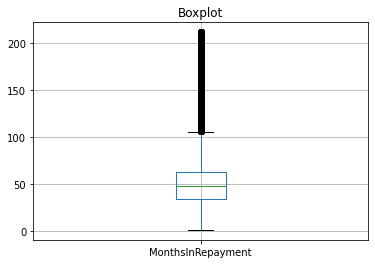

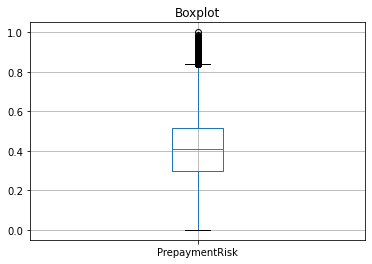

In [1759]:
for var in data.select_dtypes(exclude='O'): ## Loop which contains only numerical variables
    data.boxplot(var) 
    plt.title('Boxplot')
    plt.show() ## Creating a boxplot for all the numerical variables`

In [1760]:
## Function for capping outliers with 85th percentile and 15th percentile
def cap_outliers(data,variable):
    
    upper_limit=data[variable].quantile(0.85)
    lower_limit=data[variable].quantile(0.15)
    data[variable]=np.where(data[variable]>=upper_limit,upper_limit,
                         np.where(data[variable]<=lower_limit,lower_limit,
                                 data[variable])) ## We want values larger than upper limit and lower than lower limit

In [1761]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    cap_outliers(data,variable) ## Loop to cap outliers for the variables in the list

In [1762]:
## Function to plot distribution after removing outliers
def distribution_plot(data,variable):
    plt.figure(figsize=(8,6))
    
    plt.subplot(1,2,1)
    data.boxplot(column=variable)
    plt.title('Boxplot after handling outliers')
    
    plt.subplot(1,2,2)
    sns.distplot(data[variable])
    plt.title('Distribution after handling outliers')
    
    plt.show()

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


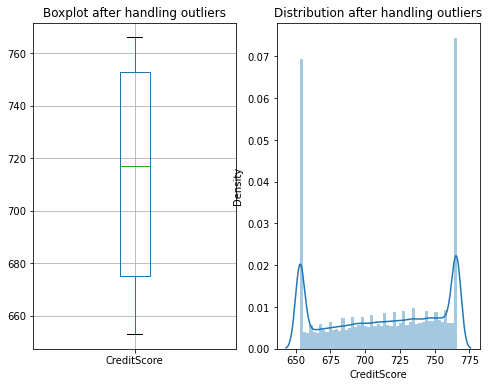

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


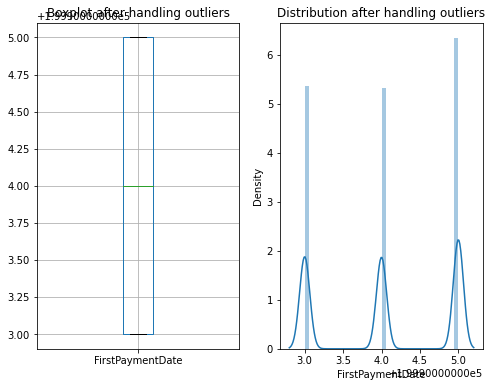

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


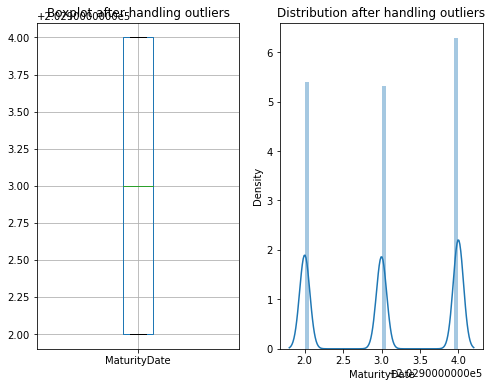

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


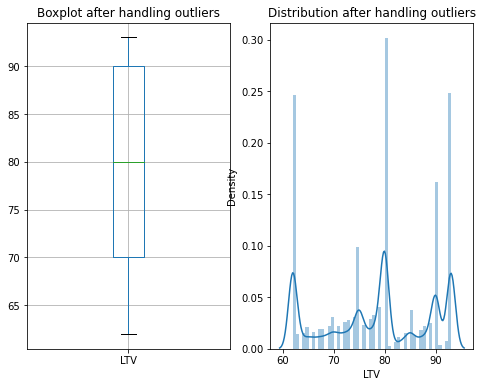

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


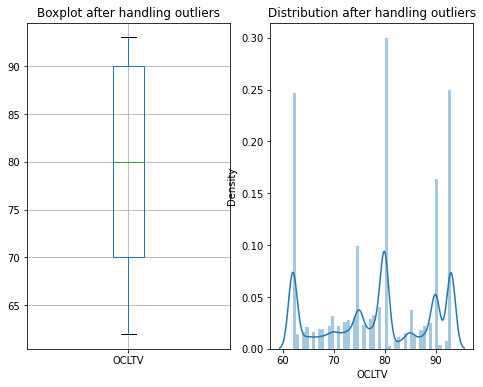

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


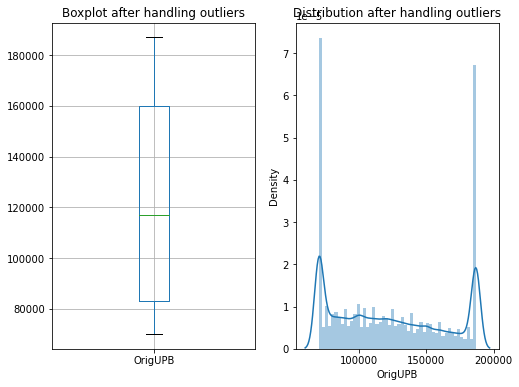

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


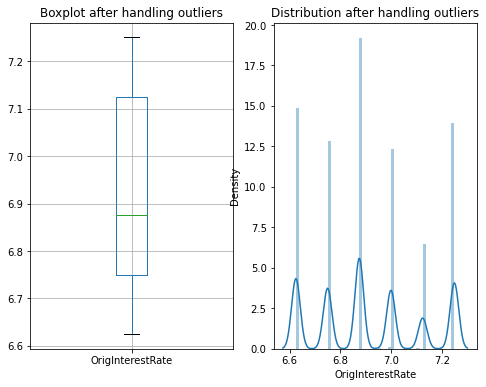

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


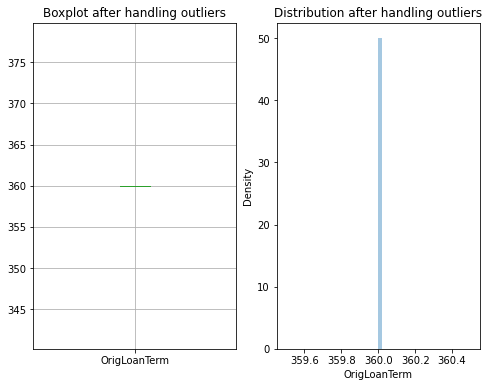

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


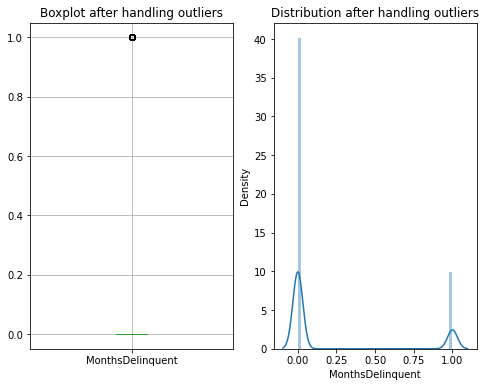

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


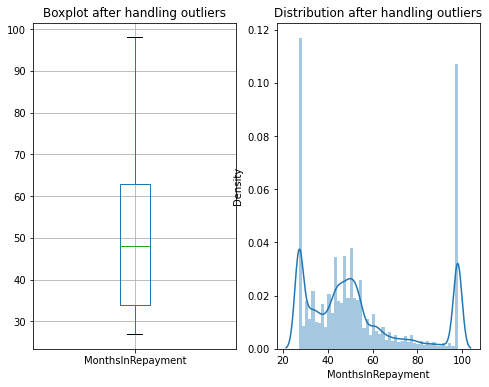

In [1763]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    distribution_plot(data,variable)

In [1764]:
for var in ['Occupancy','Channel','PPM','LoanPurpose','NumBorrowers','FirstTimeHomebuyer']:
    ordinal_mapping={k:i for i,k in enumerate(data[var].unique(),0)} ## Assigning labels starting from 0
    data[var]=data[var].map(ordinal_mapping) ## Encoding the variables with the labels assigned through the loop written above

In [1765]:
for var in ['PostalCode','ServicerName','MSA']:
    frequency_map=(data[var].value_counts()/len(data)).to_dict() ## Calculating the frequency of the variables and convert them into
    ## a dictionary
    data[var]=data[var].map(frequency_map) ## Encoding with the frequency of the variables through loop

In [1766]:
for variable in ['PropertyState','PropertyType']:
    count_map=data[variable].value_counts().to_dict() ## Calculating the number of observations present in each feature
    data[variable]=data[variable].map(count_map) ## Encoding the variables with the count of their observations

In [1767]:
data.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True) ## Dropping the irrelevant features

In [1768]:
for var in ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigLoanTerm','MonthsInRepayment']:
    data[var]=data[var].round(1).astype(int) ## rounding off the values to 1 decimal point to simplify the process

In [1769]:
data['FirstPaymentDate']=data['FirstPaymentDate'].astype(str) ## converting the feature into string
data['FirstPaymentDate']=pd.to_datetime(data['FirstPaymentDate'],format="%Y%m") ## converting to appropriate date-time format 
## using year and month

data['MaturityDate']=data['MaturityDate'].astype(str)
data['MaturityDate']=pd.to_datetime(data['MaturityDate'],format="%Y%m")

In [1770]:
data['FirstPaymentYear']=data['FirstPaymentDate'].dt.year ## extracting year from firstpaymentdate
data['FirstPaymentMonth']=data['FirstPaymentDate'].dt.month ## extracting month from firstpaymentdate
data['MaturityYear']=data['MaturityDate'].dt.year ## extracting year from maturitydate
data['MaturityMonth']=data['MaturityDate'].dt.month ## extracting month from maturitydate

In [1771]:
data.drop(['FirstPaymentDate','MaturityDate'],axis=1,inplace=True)

In [1783]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X=data.drop('PrepaymentRisk',axis=1) ## independent variables
y=data['PrepaymentRisk'] ## dependent variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to
## training
X_train.shape,X_test.shape

((233160, 27), (58291, 27))

In [1784]:
scaler=StandardScaler() ## object for standardscaler
X_train=scaler.fit_transform(X_train) ## fitting the standardscaler object in train set
X_test=scaler.transform(X_test) ## fitting the scaler object in test set

In [1785]:
from sklearn.feature_selection import SelectKBest ## Selectkbest algorithm for feature selection
from sklearn.feature_selection import f_regression ## F-score

In [1786]:
ordered_rank_features=SelectKBest(score_func=f_regression,k=15) ## This will give the top 15 features according to their F-score
ordered_feature=ordered_rank_features.fit(X,y) ## Fitting the algorithm to the dataset. Higher the F-score, more relevant
## is the feature with the target

D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
D:\Users\Muruganandham K\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [1787]:
ordered_feature.scores_ ## p-values corresponding to each F-score. Lower the p-value, more relevant the feature is with the
## target

array([1.06180755e+02,            nan, 1.06156709e+01, 1.77035292e+03,
       7.31701841e+01, 3.10751604e+01, 1.87596966e+03, 5.35199140e+06,
       1.35628423e+03, 1.85239647e+03, 1.82490808e+03, 4.75369126e+02,
       1.33040009e+00, 1.20214887e+03, 1.39225877e+02, 1.60187709e+02,
       5.43726685e+02,            nan, 1.67232821e+03, 1.48231442e+00,
       8.28359389e+01, 8.28359389e+01, 1.32665294e+02,            nan,
       2.53221547e+03,            nan, 2.60548224e+03])

In [1788]:
datascores=pd.DataFrame(ordered_feature.scores_) ## converting the F-scores numpy array to a dataframe
datacolumns=pd.DataFrame(X.columns) ## Converting the independent features array to a dataframe

In [1789]:
features_rank=pd.concat([datacolumns,datascores],axis=1) ## merging the two dataframes
features_rank.columns=['Features','Scores'] ## naming the columns
features_rank

,Features,Scores
0,CreditScore,1.061808e+02
1,FirstTimeHomebuyer,NaN
2,MSA,1.061567e+01
3,MIP,1.770353e+03
4,Units,7.317018e+01
5,Occupancy,3.107516e+01
6,OCLTV,1.875970e+03
7,DTI,5.351991e+06
8,OrigUPB,1.356284e+03
9,LTV,1.852396e+03


In [1790]:
features_rank.nlargest(15,'Scores') ## We need only 15 features to explain the maximum amount of variance in the data

,Features,Scores
7,DTI,5.351991e+06
26,MaturityMonth,2.605482e+03
24,FirstPaymentMonth,2.532215e+03
6,OCLTV,1.875970e+03
9,LTV,1.852396e+03
10,OrigInterestRate,1.824908e+03
3,MIP,1.770353e+03
18,NumBorrowers,1.672328e+03
8,OrigUPB,1.356284e+03
13,PropertyState,1.202149e+03


### Linear Regression

In [1791]:
X=data[['DTI','MaturityMonth','FirstPaymentMonth','OCLTV','LTV','OrigInterestRate','MIP','NumBorrowers','OrigUPB',
     'PropertyState','LoanPurpose','Channel','PostalCode','PropertyType','MonthsInRepayment','CreditScore']]
y=data['PrepaymentRisk']

In [1792]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((204015, 16), (87436, 16))

In [1793]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [1794]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Linear Regression - R-squared Train: {r2_train:.2f}")
print(f"Linear Regression - R-squared Test:  {r2_test:.2f}\n")

print(f"Linear Regression - MSE Train: ", mse_train)
print(f"Linear Regression - MSE Test:  ", mse_test,'\n')

print('Training Accuracy:',lr_model.score(X_train,y_pred_train))
print('Test Accuracy:',lr_model.score(X_test,y_pred_test))

Linear Regression - R-squared Train: 0.98
Linear Regression - R-squared Test:  0.98

Linear Regression - MSE Train:  0.0007627088593587704
Linear Regression - MSE Test:   0.000794224977969753 

Training Accuracy: 1.0
Test Accuracy: 1.0


### Ridge Regression

In [1795]:
from sklearn.linear_model import Ridge

In [1796]:
ridge=Ridge()
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Ridge Regression - R-squared Train: {r2_train:.2f}")
print(f"Ridge Regression - R-squared Test:  {r2_test:.2f}\n")

print(f"Ridge Regression - MSE Train: ", mse_train)
print(f"Ridge Regression - MSE Test:  ", mse_test,'\n')

print('Training Accuracy:',lr_model.score(X_train,y_pred_train))
print('Test Accuracy:',lr_model.score(X_test,y_pred_test))

Ridge Regression - R-squared Train: 0.98
Ridge Regression - R-squared Test:  0.98

Ridge Regression - MSE Train:  0.0007630564498625919
Ridge Regression - MSE Test:   0.0007945953973529312 

Training Accuracy: 0.9999889065755007
Test Accuracy: 0.9999889253332575


### Lasso Regression

In [1797]:
from sklearn.linear_model import Lasso

In [1798]:

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Lasso Regression - R-squared Train: ", r2_train)
print(f"Lasso Regression - R-squared Test:  ", r2_test,'\n')

print(f"Lasso Regression - MSE Train: ", mse_train)
print(f"Lasso Regression - MSE Test:  ", mse_test,'\n')

print('Training Accuracy:',lr_model.score(X_train,y_pred_train))
print('Test Accuracy:',lr_model.score(X_test,y_pred_test))

Lasso Regression - R-squared Train:  0.7692016930661548
Lasso Regression - R-squared Test:   0.7686491900744274 

Lasso Regression - MSE Train:  0.007407818351497586
Lasso Regression - MSE Test:   0.007405407162967814 

Training Accuracy: 0.3229519092375668
Test Accuracy: 0.32231226900788545


###  Classification Pipeline

In [1799]:
df=pd.read_csv('LoanExport.csv')
df.head()

C:\Users\Muruganandham K\AppData\Local\Temp\ipykernel_3876\3651625147.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [1800]:
df.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True) ## Dropping the irrelevant features

In [1801]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [1802]:
for var in ['MSA','PropertyType','NumBorrowers']: ## Loop containing variables used for handling nan values
    df[var]=df[var].str.strip() ## Removing the white space using str.strip()
    df[var]=df[var].replace('X','Other') ## Replacing nan values with a category "Other"`

In [1803]:
df['PPM']=df['PPM'].replace('X','Other')

In [1804]:
mode=df['FirstTimeHomebuyer'].mode()
df['FirstTimeHomebuyer']=df['FirstTimeHomebuyer'].fillna(mode)[0]

In [1805]:
## Function for removing outliers with 85th percentile and 5th percentile
def remove_outliers(df2,variable):
    
    upper_limit=df[variable].quantile(0.85)
    lower_limit=df[variable].quantile(0.15)
    df[variable]=np.where(df[variable]<=upper_limit,upper_limit,
                         np.where(df[variable]>=lower_limit,lower_limit,
                                 df[variable])) ## We want values lower than upper limit and larger than lower limit

In [1806]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    remove_outliers(df,variable) ## Loop to remove outliers for the variables in the list

In [1807]:
for var in ['Occupancy','Channel','PPM','LoanPurpose','NumBorrowers','FirstTimeHomebuyer']:
    ordinal_mapping={k:i for i,k in enumerate(df[var].unique(),0)} ## Assigning labels starting from 0
    df[var]=df[var].map(ordinal_mapping) ## Encoding the variables with the labels assigned through the loop written above

In [1808]:
for var in ['PostalCode','ServicerName','MSA']:
    frequency_map=(df[var].value_counts()/len(df)).to_dict() ## Calculating the frequency of the variables and convert them into
    ## a dictionary
    df[var]=df[var].map(frequency_map) ## Encoding with the frequency of the variables through loop

In [1809]:
for variable in ['PropertyState','PropertyType']:
    count_map=df[variable].value_counts().to_dict() ## Calculating the number of observations present in each feature
    df[variable]=df[variable].map(count_map) ## Encoding the variables with the count of their observations

In [1810]:
for var in ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigLoanTerm','MonthsInRepayment']:
    df[var]=df[var].round(1).astype(int) ## rounding off the values to 1 decimal point to simplify the process

In [1811]:
df['FirstPaymentDate']=df['FirstPaymentDate'].astype(str) ## converting the feature into string
df['FirstPaymentDate']=pd.to_datetime(df['FirstPaymentDate'],format="%Y%m") ## converting to appropriate date-time format 
## using year and month

df['MaturityDate']=df['MaturityDate'].astype(str)
df['MaturityDate']=pd.to_datetime(df['MaturityDate'],format='%Y%m')

In [1812]:
df['FirstPaymentYear']=df['FirstPaymentDate'].dt.year ## extracting year from firstpaymentdate
df['FirstPaymentMonth']=df['FirstPaymentDate'].dt.month ## extracting month from firstpaymentdate
df['MaturityYear']=df['MaturityDate'].dt.year ## extracting year from maturitydate
df['MaturityMonth']=df['MaturityDate'].dt.month ## extracting month from maturitydate

df.drop(['FirstPaymentDate','MaturityDate'],axis=1,inplace=True)

In [1813]:
X=df.drop('EverDelinquent',axis=1)
y=df['EverDelinquent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [1525]:
preprocessor = StandardScaler()

# Create a Random Forest Classifier
# You can customize the Random Forest hyperparameters as needed
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Fit the pipeline to the training data
rfc_pipeline.fit(X_train, y_train)

# Check performance
rfc_cross_val_scores = cross_val_score(rfc_pipeline, X, y, cv=5, scoring='recall')
rfc_accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation scores:", rfc_cross_val_scores)
print("Average cross-validation score:", rfc_cross_val_scores.mean())
print('Random Forest Accuracy score:', accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.76519553 0.69042664 0.60926119 0.51868551 0.41593688]
Average cross-validation score: 0.599901147798928
Random Forest Accuracy score: 0.9174829733578083
Roc_auc: 0.7967283208641869
R-squared score: 0.47962377342679086
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     46771
           1       0.98      0.60      0.74     11520

    accuracy                           0.92     58291
   macro avg       0.94      0.80      0.85     58291
weighted avg       0.92      0.92      0.91     58291

Confusion Matrix:
 [[46603   168]
 [ 4642  6878]]


In [1526]:
import pickle
# Open the file in write mode and save the model using pickle.dump()
file_path = 'rfc_pipeline.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(rfc_pipeline, file)
    
rfc_pipeline=pickle.load(open('rfc_pipeline.pkl',"rb"))
score=rfc_pipeline.score(X,y)
print(score*100)

98.21513736442833


In [1527]:
preprocessor = StandardScaler()

# Create a Gradient Boosting Classifier
# You can customize the classifier's hyperparameters as needed
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb_classifier)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Check performance
gb_cross_val_scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
gb_accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation scores:", gb_cross_val_scores)
print("Average cross-validation score:", gb_cross_val_scores.mean())
print('GradientBoostingClassifier Accuracy score:', accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.7638082  0.6890392  0.60804717 0.51677794 0.41402931]
Average cross-validation score: 0.5983403639359814
GradientBoostingClassifier Accuracy score: 0.9197303185740509
Roc_auc: 0.7969184027777778
R-squared score: 0.49379618209229825
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     46771
           1       1.00      0.59      0.75     11520

    accuracy                           0.92     58291
   macro avg       0.95      0.80      0.85     58291
weighted avg       0.93      0.92      0.91     58291

Confusion Matrix:
 [[46771     0]
 [ 4679  6841]]


In [1528]:
import pickle
# Open the file in write mode and save the model using pickle.dump()
file_path = 'gbc_pipeline.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(pipeline, file)
    
gbc_pipeline=pickle.load(open('gbc_pipeline.pkl',"rb"))
score=gbc_pipeline.score(X,y)
print(score*100)

92.05355274128412


### Conclusion: GBC is giving us better accuracy

### Regression Pipeline

In [1529]:
data=pd.read_csv('LoanExport.csv')
data.head()

C:\Users\Muruganandham K\AppData\Local\Temp\ipykernel_3876\1530365617.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [1530]:
from sklearn.preprocessing import MinMaxScaler

data['PrepaymentRisk'] = data['CreditScore'] * data['DTI']

# Scale the prepayment risk values between 0 and 1
scaler = MinMaxScaler()
data['PrepaymentRisk'] = scaler.fit_transform(data[['PrepaymentRisk']])

In [1531]:
for var in ['MSA','PropertyType','NumBorrowers']: ## Loop containing variables used for handling nan values
    data[var]=data[var].str.strip() ## Removing the white space using str.strip()
    data[var]=data[var].replace('X','Other') ## Replacing nan values with a category "Other"

In [1532]:
for var in ['FirstTimeHomebuyer','SellerName']:
    mode=data[var].mode()
    data[var]=data[var].fillna(mode)[0]

In [1533]:
data['PPM']=data['PPM'].replace('X','Other') ## Replacing nan values with "Other"

In [1534]:
## Function for capping outliers with 85th percentile and 15th percentile
def cap_outliers(data,variable):
    
    upper_limit=data[variable].quantile(0.85)
    lower_limit=data[variable].quantile(0.15)
    data[variable]=np.where(data[variable]>=upper_limit,upper_limit,
                         np.where(data[variable]<=lower_limit,lower_limit,
                                 data[variable])) ## We want values larger than upper limit and lower than lower limit

In [1535]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    cap_outliers(data,variable) ## Loop to cap outliers for the variables in the list

In [1536]:
for var in ['Occupancy','Channel','PPM','LoanPurpose','NumBorrowers','FirstTimeHomebuyer']:
    ordinal_mapping={k:i for i,k in enumerate(data[var].unique(),0)} ## Assigning labels starting from 0
    data[var]=data[var].map(ordinal_mapping) ## Encoding the variables with the labels assigned through the loop written above

In [1537]:
for var in ['PostalCode','ServicerName','MSA']:
    frequency_map=(data[var].value_counts()/len(data)).to_dict() ## Calculating the frequency of the variables and convert them into
    ## a dictionary
    data[var]=data[var].map(frequency_map) ## Encoding with the frequency of the variables through loop

In [1538]:
for variable in ['PropertyState','PropertyType']:
    count_map=data[variable].value_counts().to_dict() ## Calculating the number of observations present in each feature
    data[variable]=data[variable].map(count_map) ## Encoding the variables with the count of their observations

In [1539]:
data.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True) ## Dropping the irrelevant features

In [1540]:
for var in ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigLoanTerm','MonthsInRepayment']:
    data[var]=data[var].round(1).astype(int) ## rounding off the values to 1 decimal point to simplify the process

In [1541]:
data['FirstPaymentDate']=data['FirstPaymentDate'].astype(str) ## converting the feature into string
data['FirstPaymentDate']=pd.to_datetime(data['FirstPaymentDate'],format="%Y%m") ## converting to appropriate date-time format 
## using year and month

data['MaturityDate']=data['MaturityDate'].astype(str)
data['MaturityDate']=pd.to_datetime(data['MaturityDate'],format='%Y%m')

In [1542]:
data['FirstPaymentYear']=data['FirstPaymentDate'].dt.year ## extracting year from firstpaymentdate
data['FirstPaymentMonth']=data['FirstPaymentDate'].dt.month ## extracting month from firstpaymentdate
data['MaturityYear']=data['MaturityDate'].dt.year ## extracting year from maturitydate
data['MaturityMonth']=data['MaturityDate'].dt.month ## extracting month from maturitydate

In [1543]:
data.drop(['FirstPaymentDate','MaturityDate'],axis=1,inplace=True)

In [1544]:
X=data.drop('PrepaymentRisk',axis=1)
y=data['PrepaymentRisk']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [1545]:
from sklearn.pipeline import make_pipeline
# Create the Linear Regression model
linear_regression_model = LinearRegression()
pre_process = StandardScaler()

# Create the Ridge Regression model with L2 regularization
ridge_regression_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for different levels of regularization

# Create the pipelines
linear_regression_pipeline = make_pipeline(
    pre_process,
    PCA(n_components=0.95),
    MinMaxScaler(),
    linear_regression_model
)

ridge_regression_pipeline = make_pipeline(
    pre_process,
    PCA(n_components=0.95),
    MinMaxScaler(),
    ridge_regression_model
)

# Fit the pipelines to the training data
linear_regression_pipeline.fit(X_train, y_train)
ridge_regression_pipeline.fit(X_train, y_train)

# Make predictions using the trained pipelines
y_pred_linear = linear_regression_pipeline.predict(X_test)
y_pred_ridge = ridge_regression_pipeline.predict(X_test)

# Perform evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("R-squared Score:", r2_linear)

print("\nRidge Regression Metrics:")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("R-squared Score:", r2_ridge)

# Print the coefficients and intercept for Ridge Regression
print("\nRidge Regression Coefficients:", ridge_regression_model.coef_)
print("Ridge Regression Intercept:", ridge_regression_model.intercept_)

# Print the coefficients and intercept for Linear Regression
print("\nLinear Regression Coefficients:", linear_regression_model.coef_)
print("Linear Regression Intercept:", linear_regression_model.intercept_)

Linear Regression Metrics:
Mean Squared Error: 0.0013629712070582628
Mean Absolute Error: 0.022787851354183573
R-squared Score: 0.9572901235644289

Ridge Regression Metrics:
Mean Squared Error: 0.0013629449509279178
Mean Absolute Error: 0.022788464868241584
R-squared Score: 0.9572909463228826

Ridge Regression Coefficients: [ 1.21942667e-01 -7.74655071e-04  1.37192931e-01  1.80823315e-01
  2.10027050e-01  3.87566746e-01 -1.28475618e-01 -3.91971908e-01
  1.33194192e+00 -1.24170985e+00 -4.11721334e-01 -1.84342343e-01
  2.18706031e-01 -6.51809797e-01 -2.44163542e-01 -4.97754570e-01
  4.19621984e-02 -1.09295905e-02]
Ridge Regression Intercept: 0.971500779836775

Linear Regression Coefficients: [ 1.21953454e-01 -7.74758593e-04  1.37205749e-01  1.80871390e-01
  2.10093184e-01  3.87747409e-01 -1.28574881e-01 -3.92115707e-01
  1.33310543e+00 -1.24272354e+00 -4.12243738e-01 -1.84417443e-01
  2.18860488e-01 -6.52175788e-01 -2.44249946e-01 -4.97948355e-01
  4.19774196e-02 -1.09327849e-02]
Linear 

###  Conclusion: Linear Regression and Ridge Regression are giving us the best results while lasso regression is not suitable for this prediction

### Regression results with classification features

In [1546]:
# Open the file in write mode and save the model using pickle.dump()
file_path = 'linear_pipeline.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(linear_regression_pipeline, file)
    
linear_pipeline=pickle.load(open('linear_pipeline.pkl',"rb"))
score=linear_pipeline.score(X,y)
print(score*100)

95.82059632567372


In [1547]:
# Open the file in write mode and save the model using pickle.dump()
file_path = 'Ridge_pipeline.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(ridge_regression_pipeline, file)
    
Ridge_pipeline=pickle.load(open('Ridge_pipeline.pkl',"rb"))
score=Ridge_pipeline.score(X,y)
print(score*100)

95.82057426242616
